# Aviation Accidents

![plane crash](img/plane-crash.png)

_Image source: [gta5-mods.com](https://www.gta5-mods.com/maps/dynamic-plane-crash)_

[The NTSB aviation accident dataset](https://www.kaggle.com/khsamaha/aviation-accident-database-synopses)

In [22]:
# Import all modules
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline
plt.rcParams['figure.figsize'] = (15,6)

## A Look at the Data



In [2]:
filename_data = 'AviationData.csv'
encoding = 'iso-8859-1'
path_data = os.path.join('..', 'data', filename_data)
df = pd.read_csv(path_data, encoding=encoding)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.Flight,Air.Carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date
0,20181217X10943,Accident,GAA19CA098,2018-12-16,"Grangville, ID",United States,45.583611,-115.681667,PVT,NaN,...,Positioning,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Preliminary,2018-12-18
1,20181217X25746,Accident,GAA19CA097,2018-12-15,"MORIARTY, NM",United States,34.970000,-106.000000,NaN,MORIARTY MUNI,...,Personal,NaN,NaN,NaN,NaN,1.0,VMC,NaN,Preliminary,2018-12-20
2,20181213X41114,Accident,ERA19LA065,2018-12-13,"Punta Gorda, FL",United States,26.925278,-82.001111,PGD,Punta Gorda,...,Personal,NaN,NaN,NaN,1.0,NaN,VMC,APPROACH,Preliminary,2018-12-21
3,20181213X45528,Accident,CEN19FA044,2018-12-13,"Valparaiso, IN",United States,41.451667,-87.004444,VPZ,Porter County Rgnl,...,Personal,NaN,1.0,NaN,NaN,NaN,VMC,TAKEOFF,Preliminary,2018-12-19
4,20181214X90303,Accident,GAA19CA096,2018-12-11,"Hartford, WI",United States,43.330278,-88.326111,HXF,Hartford Muni,...,Personal,NaN,NaN,NaN,NaN,1.0,VMC,NaN,Preliminary,2018-12-18


In [3]:
# Data column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82635 entries, 0 to 82634
Data columns (total 31 columns):
Event.Id                  82635 non-null object
Investigation.Type        82634 non-null object
Accident.Number           82635 non-null object
Event.Date                82635 non-null object
Location                  82560 non-null object
Country                   82128 non-null object
Latitude                  28732 non-null float64
Longitude                 28723 non-null float64
Airport.Code              46776 non-null object
Airport.Name              49514 non-null object
Injury.Severity           82635 non-null object
Aircraft.Damage           80043 non-null object
Aircraft.Category         25900 non-null object
Registration.Number       79053 non-null object
Make                      82562 non-null object
Model                     82533 non-null object
Amateur.Built             82008 non-null object
Number.of.Engines         78026 non-null float64
Engine.Type             

In [4]:
# row count
df.shape[0]

82635

Drop data that is not interested in

In [5]:
# Drop unused data
unused_cols = [
    'Event.Id',
    'Accident.Number',
    'Latitude',
    'Longitude',
    'Registration.Number',
    'Publication.Date'
]

df = df.drop(unused_cols, axis='columns')
df.sample(5)

,Investigation.Type,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.Damage,Aircraft.Category,Make,...,Schedule,Purpose.of.Flight,Air.Carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status
76060,Incident,1983-10-15,"WOODLAND, CA",United States,203,YOLO COUNTY,Incident,Minor,NaN,CESSNA,...,NaN,Instructional,NaN,0.0,0.0,0.0,6.0,VMC,TAKEOFF,Probable Cause
72915,Accident,1984-09-09,"LYNCHBURG, VA",United States,LYH,LYNCHBURG,Non-Fatal,Destroyed,NaN,PIPER,...,NaN,Personal,NaN,0.0,1.0,1.0,0.0,VMC,TAKEOFF,Probable Cause
50157,Accident,1993-04-07,"AUGUSTA, GA",United States,DNL,DANIEL FIELD,Non-Fatal,Destroyed,NaN,BEECH,...,NaN,Personal,NaN,0.0,0.0,1.0,0.0,VMC,APPROACH,Probable Cause
9293,Accident,2013-02-10,"Acton, CA",United States,NaN,NaN,Fatal(3),Substantial,Helicopter,BELL,...,NaN,Other Work Use,NaN,3.0,NaN,NaN,NaN,VMC,MANEUVERING,Probable Cause
53490,Accident,1991-09-21,"HACKETTSTOWN, NJ",United States,N05,HACKETTSTOWN,Non-Fatal,Substantial,NaN,PIPER,...,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,LANDING,Probable Cause


## Clean Data

In [6]:
df.isnull().sum()

Investigation.Type            1
Event.Date                    0
Location                     75
Country                     507
Airport.Code              35859
Airport.Name              33121
Injury.Severity               0
Aircraft.Damage            2592
Aircraft.Category         56735
Make                         73
Model                       102
Amateur.Built               627
Number.of.Engines          4609
Engine.Type                3982
FAR.Description           57068
Schedule                  70905
Purpose.of.Flight          4550
Air.Carrier               78545
Total.Fatal.Injuries      25967
Total.Serious.Injuries    28466
Total.Minor.Injuries      27288
Total.Uninjured           13795
Weather.Condition          2708
Broad.Phase.of.Flight      6503
Report.Status                 0
dtype: int64

There are a lot of `null` values. Some of the data are predictable, thus can be filled in.

First, some data can be filled as _unknown_

In [7]:
df['Weather.Condition'].fillna('UNK', inplace=True)

### Number of Engines
Number of engines can be guessed by looking at other values with the same aircraft type.

In [8]:
def guess_number_of_engines(num_engines, model):
    """ Guess number of engines by looking at other same model in the dataset
    """
    if num_engines >= 0:
        return num_engines
    else:
        # guess number of engine of the same model
        guess = df['Number.of.Engines'][df['Model'] == model].max()
        
        return int(guess) if guess > 0 else None
    
num_engines = df.apply(lambda x: guess_number_of_engines(x['Number.of.Engines'], x['Model']), axis=1)
df = df.assign(NumberOfEngines=num_engines, index=df.index)
df = df.drop('Number.of.Engines', axis=1)

### Aircraft Category
Similar to above, guess the aircraft category

In [10]:
def guess_aircraft_cat(cat, model):
    """ Guess aircraft category by looking at other same model in the dataset
    """
    if type(cat) == str:
        return cat
    else:
        # guess aircraft category
        guess = df['Aircraft.Category'][df['Model'] == model].mode()
        return guess[0] if guess.count() > 0 else None
    
aircraft_cat = df.apply(lambda x: guess_aircraft_cat(x['Aircraft.Category'], x['Model']), axis=1)
df = df.assign(AircraftCategory=aircraft_cat, index=df.index)
df = df.drop('Aircraft.Category', axis=1)

### Engine Types
Similar to above, guess the engine type

In [11]:
def guess_engine_type(engine_type, model):
    """ Guess engine type by looking at other same model in the dataset
    """
    if type(engine_type) == str:
        return engine_type
    else:
        # Guess engine type
        guess = df['Engine.Type'][df['Model'] == model].mode()
        return guess[0] if guess.count() > 0 else None

engine_types = df.apply(lambda x: guess_engine_type(x['Engine.Type'], x['Model']), axis=1)
df = df.assign(EngineType=engine_types, index=df.index)
df = df.drop('Engine.Type', axis=1)

### Balloon
We're not interested in balloons, remove it from dataset

In [12]:
df = df[df['AircraftCategory'] != 'Balloon']

Check null data again

In [13]:
df.isnull().sum()

Investigation.Type            1
Event.Date                    0
Location                     75
Country                     507
Airport.Code              35489
Airport.Name              32744
Injury.Severity               0
Aircraft.Damage            2420
Make                         73
Model                       102
Amateur.Built               627
FAR.Description           56834
Schedule                  70482
Purpose.of.Flight          4550
Air.Carrier               78119
Total.Fatal.Injuries      25786
Total.Serious.Injuries    28413
Total.Minor.Injuries      27154
Total.Uninjured           13768
Weather.Condition             0
Broad.Phase.of.Flight      6492
Report.Status                 0
NumberOfEngines            1397
index                         0
AircraftCategory           8873
EngineType                  900
dtype: int64

### Extra columns

In [14]:
df['Year'] = df['Event.Date'].apply(lambda d: datetime.datetime.strptime(d, "%Y-%m-%d").year)
df.head()

,Investigation.Type,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.Damage,Make,Model,...,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,NumberOfEngines,index,AircraftCategory,EngineType,Year
0,Accident,2018-12-16,"Grangville, ID",United States,PVT,NaN,Non-Fatal,Substantial,Cessna,170,...,NaN,1.0,UNK,NaN,Preliminary,1.0,0,Airplane,Reciprocating,2018
1,Accident,2018-12-15,"MORIARTY, NM",United States,NaN,MORIARTY MUNI,Non-Fatal,Substantial,Cessna,180,...,NaN,1.0,VMC,NaN,Preliminary,1.0,1,Airplane,Reciprocating,2018
2,Accident,2018-12-13,"Punta Gorda, FL",United States,PGD,Punta Gorda,Non-Fatal,Substantial,CZECH SPORT AIRCRAFT AS,Piper Sport,...,1.0,NaN,VMC,APPROACH,Preliminary,1.0,2,Airplane,Reciprocating,2018
3,Accident,2018-12-13,"Valparaiso, IN",United States,VPZ,Porter County Rgnl,Fatal(1),Destroyed,Piper,PA24,...,NaN,NaN,VMC,TAKEOFF,Preliminary,1.0,3,Airplane,Reciprocating,2018
4,Accident,2018-12-11,"Hartford, WI",United States,HXF,Hartford Muni,Non-Fatal,Substantial,Beech,36,...,NaN,1.0,VMC,NaN,Preliminary,1.0,4,Airplane,Reciprocating,2018


## Analyze, Model, and Visualize

### How safe is air travelling over time?

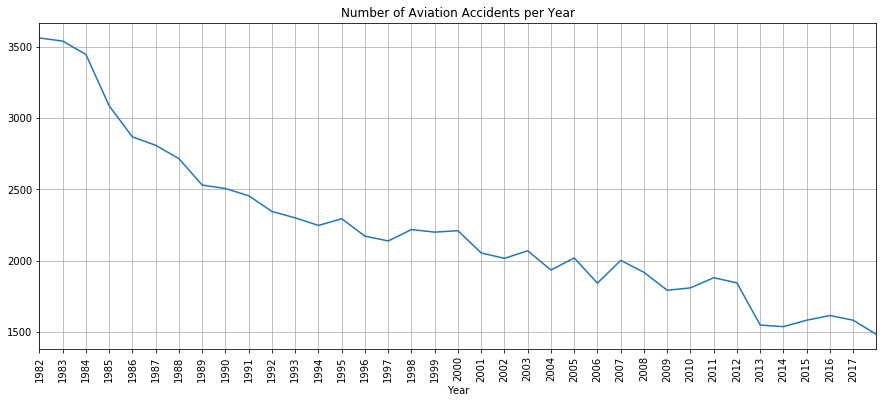

In [23]:
years = np.arange(1982, 2018)

df[df['Year'] > 1981].groupby('Year').size().plot(kind='line',
                                                  xticks=years,
                                                  rot=90,
                                                  title='Number of Aviation Accidents per Year',
                                                  grid=True)

There is a clear trend that air travelling is becoming safer and safer.
The highest drop in accidents occurs in the year:
- 1985
- 2013

In some years, the number of accidents slightly increase, but overall, it drops over time.

### How is weather affecting aviation accidents?

In [17]:
# First clean the weather data
df['Weather.Condition'].unique()

array(['UNK', 'VMC', 'IMC'], dtype=object)

The weather condition types are:
- UNK: Unknown
- VMC - Visual meteorological conditions: a flight category where visual flight rules (VFR) is permitted. It means pilots can fly the aircraft using visual techniques.
- IMC: Instrument meteorological conditions: a flight category where pilots fly by reference to the instruments under instrument flight rules (IFR) due to bad weather and/or bad visibility during flight.

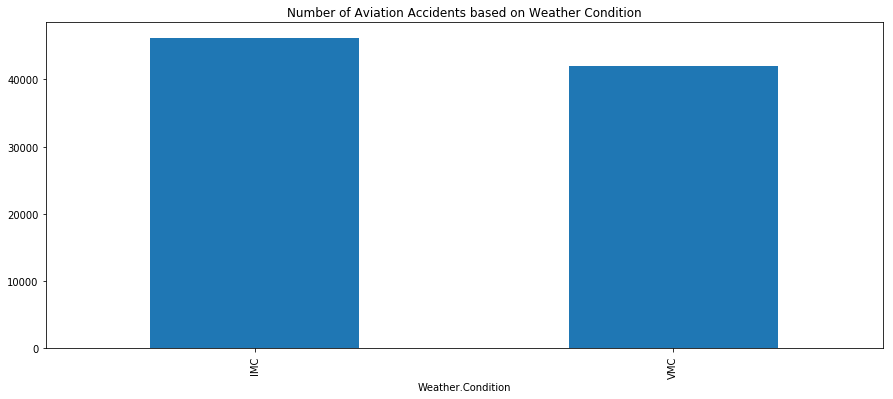

In [24]:
df[df['Weather.Condition'] != 'UNK'].groupby('Weather.Condition').mean().plot(kind='bar',
                                            y='index',
                                            legend=False,
                                            title='Number of Aviation Accidents based on Weather Condition')

On average, IFR flights in bad weather condition are slightly less safe than flying in good weather condition with VFR.

### What Phase of Flight is an Accident Likely to Occur?

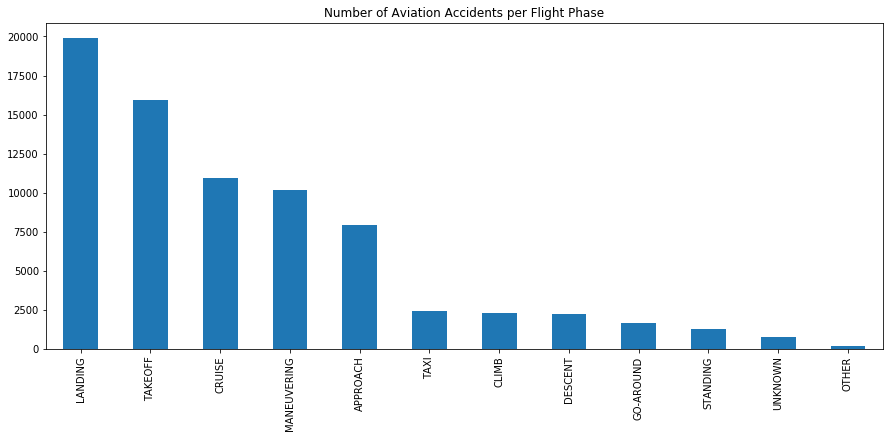

In [25]:
df['Broad.Phase.of.Flight'].value_counts().plot(kind='bar',
                                                title='Number of Aviation Accidents per Flight Phase')

The majority of accidents occur during landing but not during approach phase. The second highest number of accidents occurs during takeoff. Pilots definitely pay the most attention during takeoff and landing phases of the flight.